In [1]:
import pandas as pd

In [2]:
neighborhoods = pd.read_csv("Neighborhoods.csv")
hoodsdict = neighborhoods['hood'].value_counts().to_dict()
neighborhoods.set_index('hood')

fire = pd.read_csv("firearm-seizures.csv")
firedict = fire['neighborhood'].value_counts().to_dict()

arrest = pd.read_csv("arrest-data.csv")
arrestdict = arrest['INCIDENTNEIGHBORHOOD'].value_counts().to_dict()

policeblotter = pd.read_csv("police-blotter.csv")
policedict = policeblotter['INCIDENTNEIGHBORHOOD'].value_counts().to_dict()

scores = hoodsdict

#this section of for loops cleans the data to make sure all of the neighborhoods have the same name for every dataset
for key in arrestdict:
    if key.startswith('Mt. Oliver Neighborhood'):
        arrestdict['Mt. Oliver'] = arrestdict.pop(key)
        break
        
for key in arrestdict:
    if key.startswith('Mount Oliver'):
        arrestdict['Mt. Oliver'] = arrestdict['Mt. Oliver'] + arrestdict.pop(key)
        break
        
for key in policedict:
    if key.startswith('Mount Oliver'):
        policedict['Mt. Oliver'] = policedict.pop(key)
        
for key in policedict:
    if key.startswith('Central North Side'):
        policedict['Central Northside'] = policedict.pop(key)

#combines single neighborhoods that were separated into one neighborhood
arrestdict['Troy Hill'] = arrestdict['Troy Hill'] + arrestdict.pop('Troy Hill-Herrs Island')
arrestdict['Central Business District'] = arrestdict['Central Business District'] + arrestdict.pop('Golden Triangle/Civic Arena')

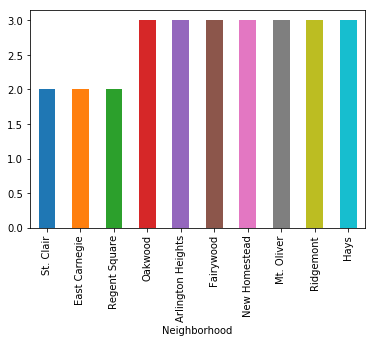

In [22]:
policeScores = hoodsdict

for key in policedict:
    if key in policeScores:
        policeScores[key] = policedict[key]
        
s = pd.Series(scores, name="Score")
s.index.name = "Neighborhood"
s.sort_values().iloc[0:10].plot('bar')

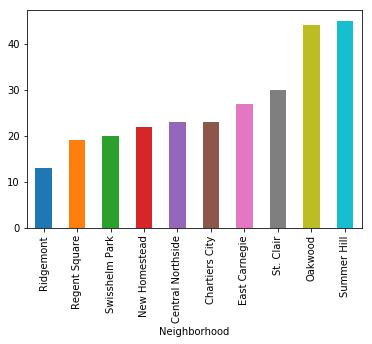

In [21]:
arrestScores = hoodsdict

for key in arrestdict:
    if key in arrestScores:
        arrestScores[key] = arrestdict[key]
        
s = pd.Series(scores, name="Score")
s.index.name = "Neighborhood"
s.sort_values().iloc[0:10].plot('bar')

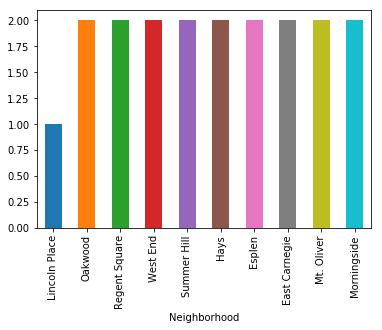

In [20]:
fireScores = hoodsdict

for key in firedict:
    if key in fireScores:
        fireScores[key] = firedict[key]
        
s = pd.Series(scores, name="Score")
s.index.name = "Neighborhood"
s.sort_values().iloc[0:10].plot('bar')